<a href="https://colab.research.google.com/github/BrianKipngeno/Stock_Portfolio_Optimization/blob/main/Stock_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock market portfolio optimization is the process of selecting the best combination of stocks to maximize returns while minimizing the risk, based on historical performance data and financial metrics.

This involves:

1. Analyzing Price trends
2. Calculating expected returns and volatilities
3. Determining correlatiobn between stocks for diversifiation

We use techniques such as **Modern Portfolio Theory** to construct an efficient portfolio that represents the optimal risk-reward tradeoff.

We also use **Sharpe ratio** that indicates the best risk adjusted return to provide a clear allocation strategy for allocation in order to achieve long term investment goals.

## Research Problem

Our goal is to develop a portfolio optimization strategy using the given stock market data.

Dataset link: https://bit.ly/stock_data

This involves analyzing historical price trends, calculating key financial metrics, and applying Modern Portfolio Theory (MPT) to construct an efficient portfolio.

The primary objectives are:

- Identify trends in stock prices using moving averages and other technical indicators.
- Calculate the volatility and risk associated with each stock.
- Determine the correlation between different stocks to understand their relationships and potential diversification benefits.
- Generate and evaluate a series of random portfolios to identify the optimal portfolio that maximizes the Sharpe ratio, balancing risk and return effectively.

Expected results include:

- Identification of the portfolio with the maximum Sharpe ratio, including the weights of each stock and the associated risk-return profile.
- Recommendations for constructing a diversified investment portfolio that maximizes returns while minimizing risk, based on the historical performance and statistical analysis of the provided stock data.

In [2]:
# Loading necessary libraries
#
import pandas as pd
import numpy as np

In [3]:
# Loading our dataset
#
stock_data = pd.read_csv('https://bit.ly/stock_data')
stock_data.head()

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-03,HDFCBANK.NS,1696.631836,1719.800049,1757.500000,1710.000000,1712.500000,22052058.0
1,2023-07-03,INFY.NS,1309.278564,1333.699951,1346.000000,1328.449951,1330.000000,7732412.0
2,2023-07-03,RELIANCE.NS,2405.791992,2414.290283,2420.105225,2358.587158,2361.079346,6077193.0
3,2023-07-03,TCS.NS,3216.993164,3272.300049,3318.800049,3268.750000,3314.300049,1687264.0
4,2023-07-04,HDFCBANK.NS,1704.918579,1728.199951,1747.000000,1713.800049,1723.449951,19397594.0


In [4]:
# Checking the shape of our dataset

stock_data.shape

(972, 8)

In [6]:
stock_data['Ticker'].unique()

array(['HDFCBANK.NS', 'INFY.NS', 'RELIANCE.NS', 'TCS.NS'], dtype=object)

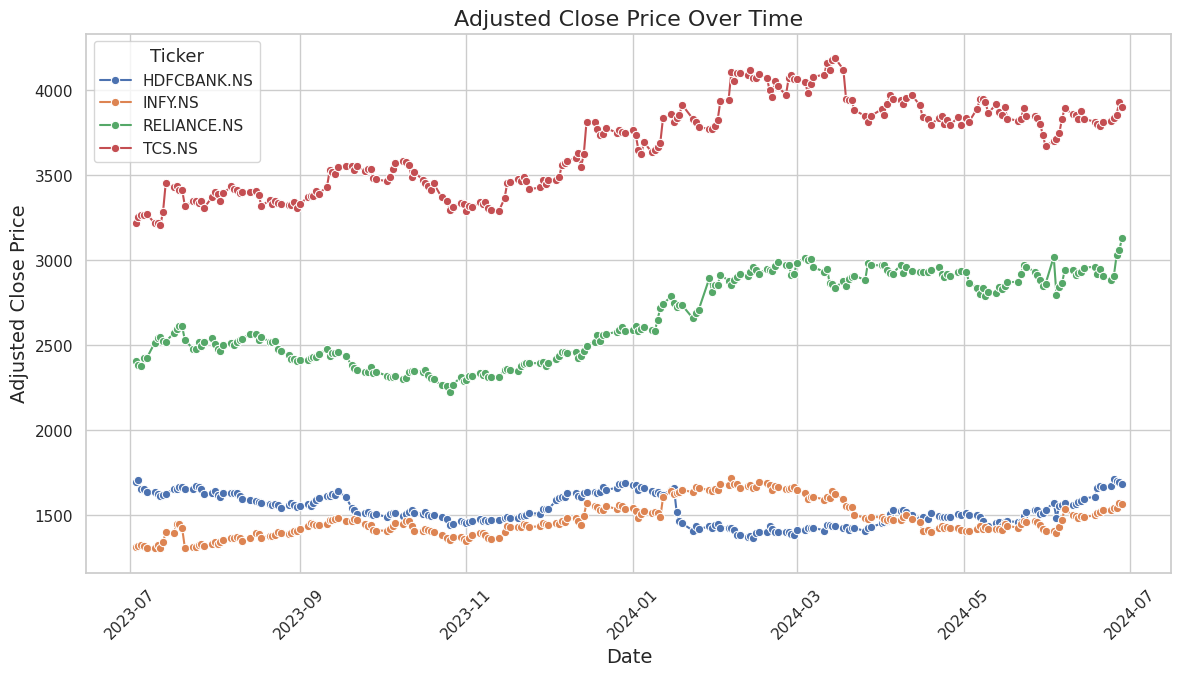

In [5]:
# let’s have a look at the stock market performance of these companies in the stock market over time
#
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

- The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024.

- It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK.

- The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

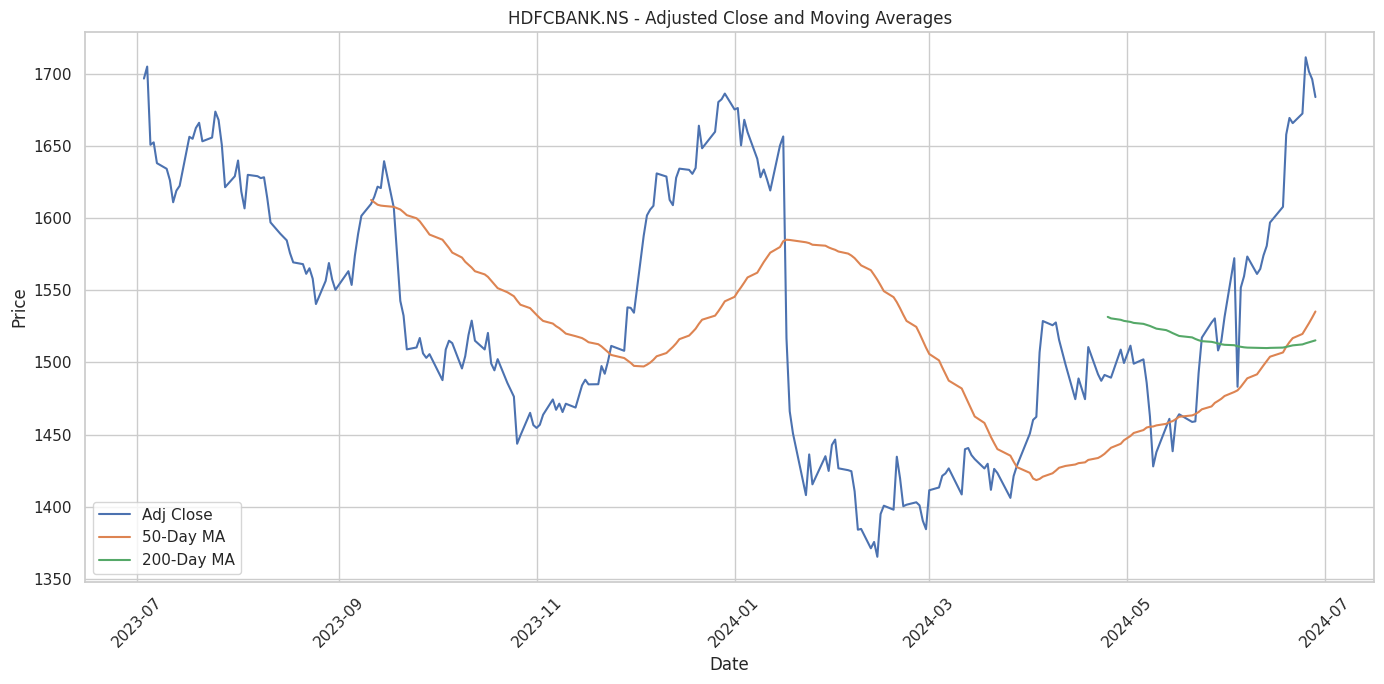

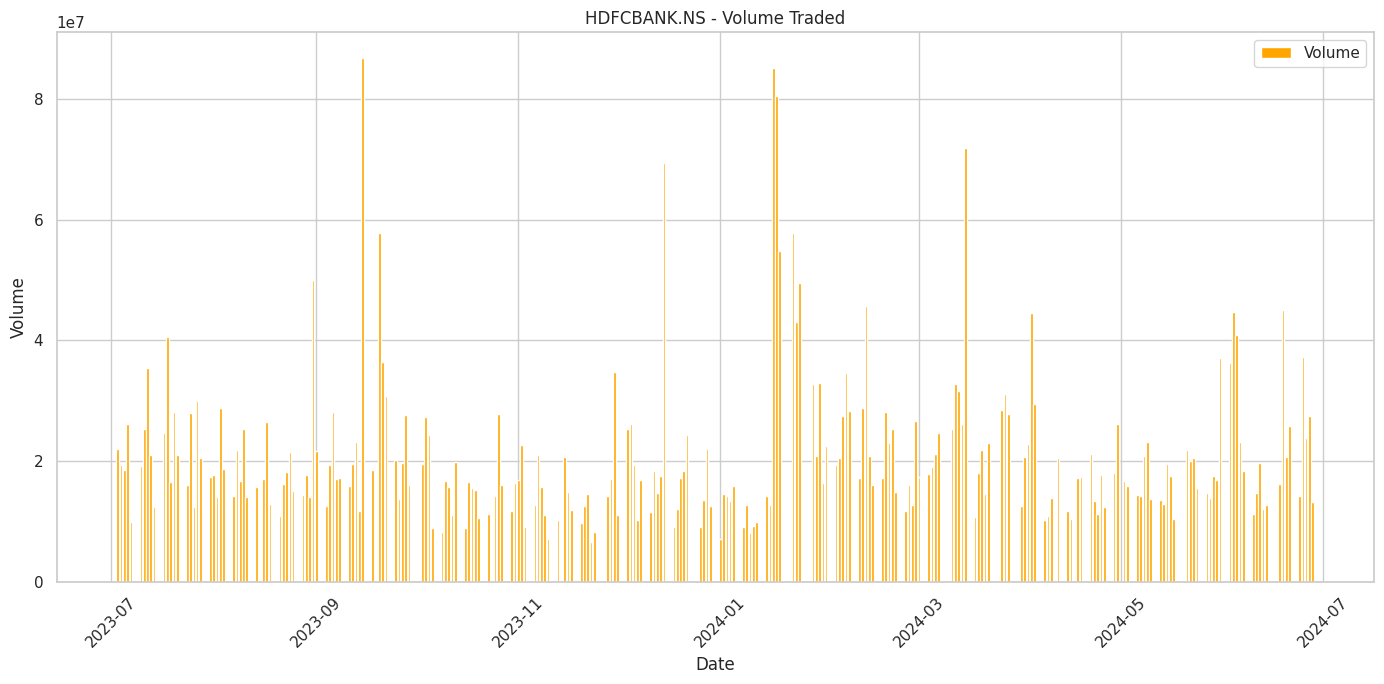

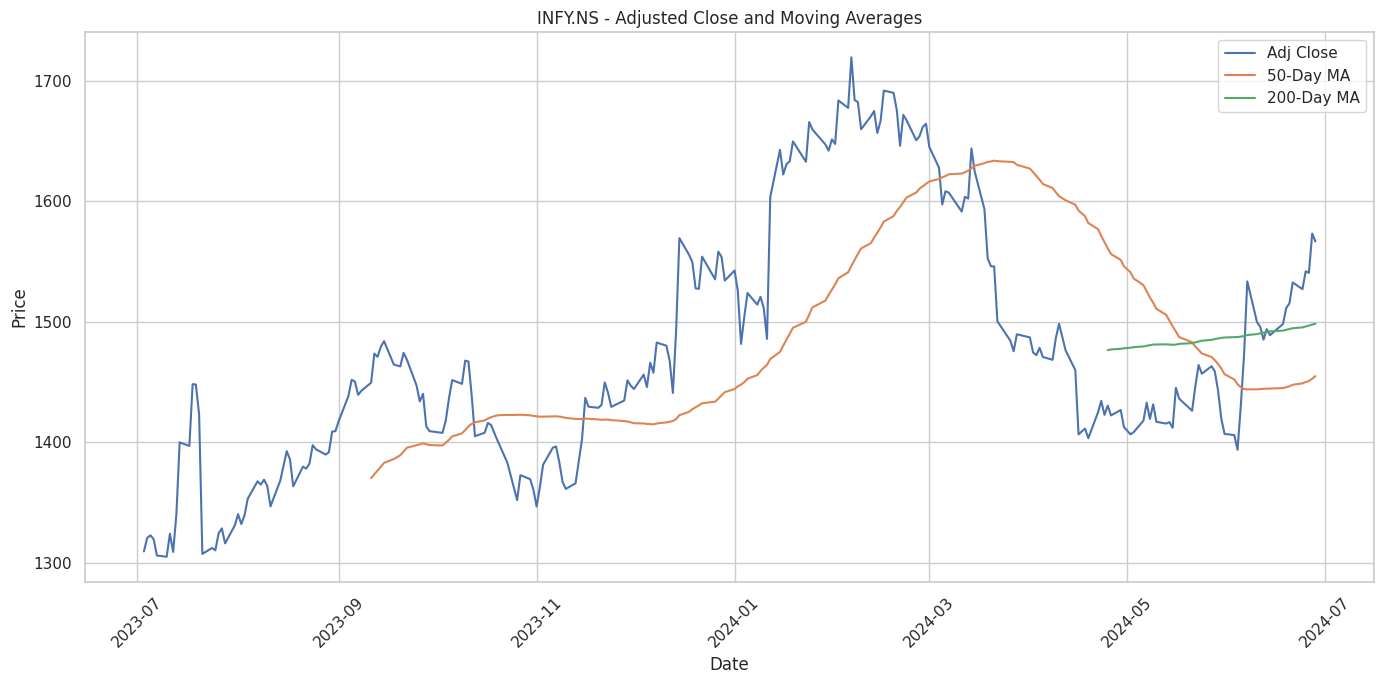

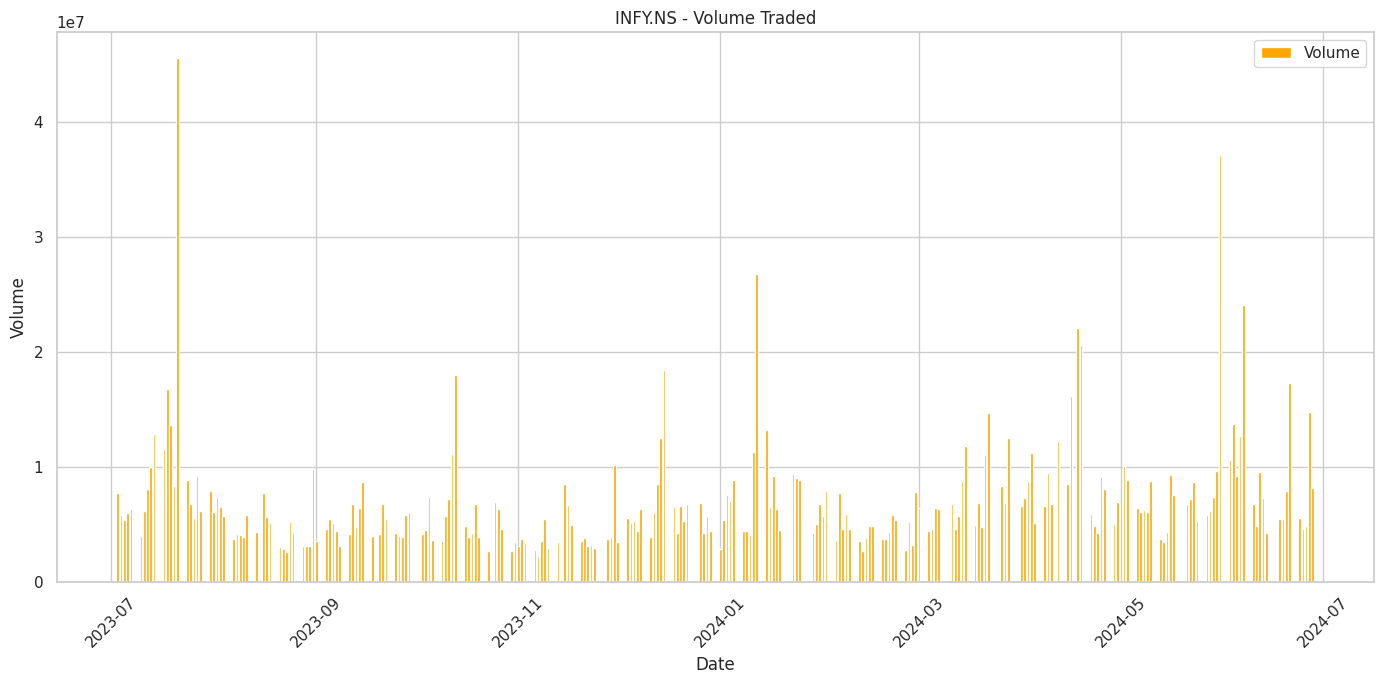

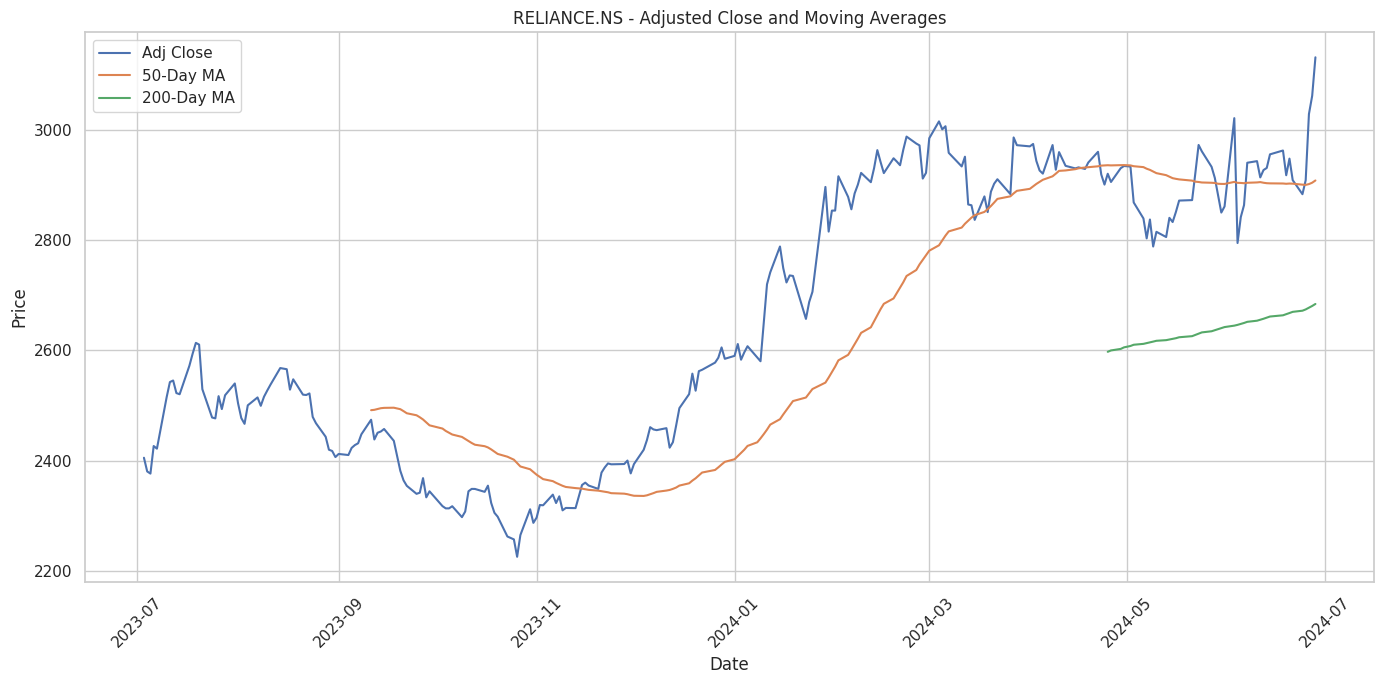

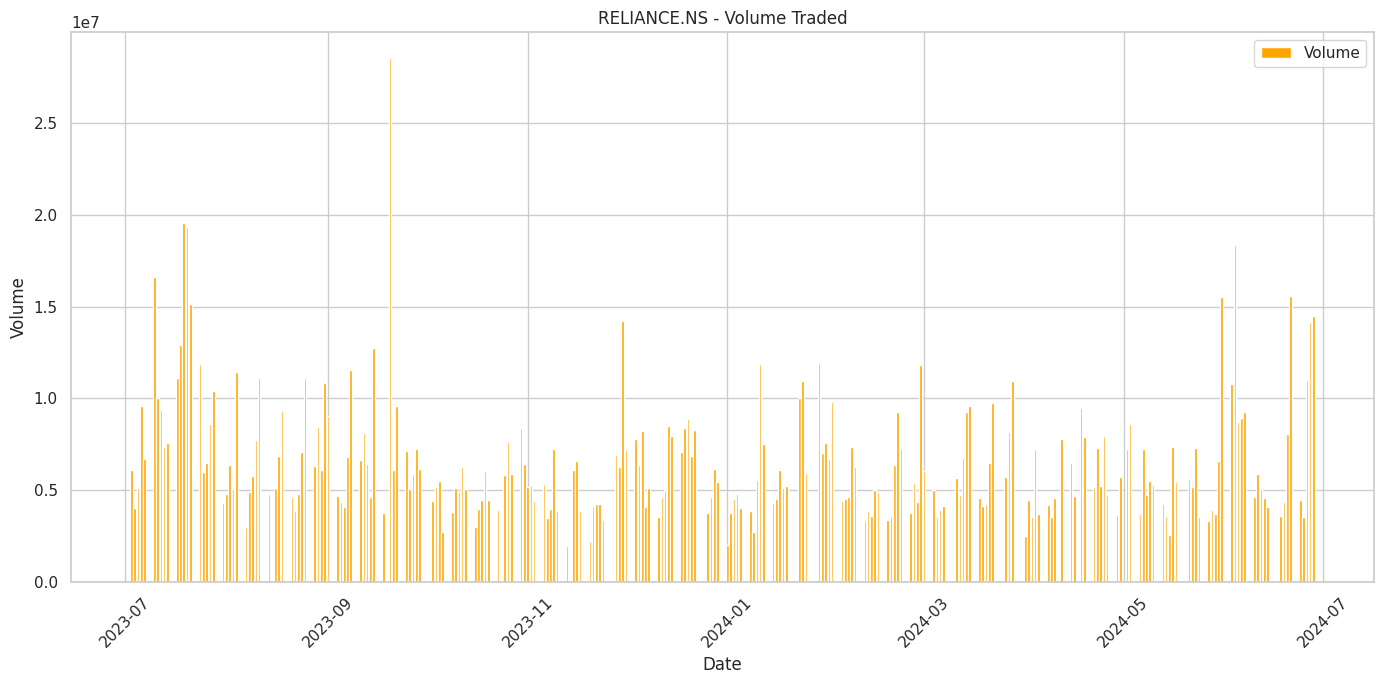

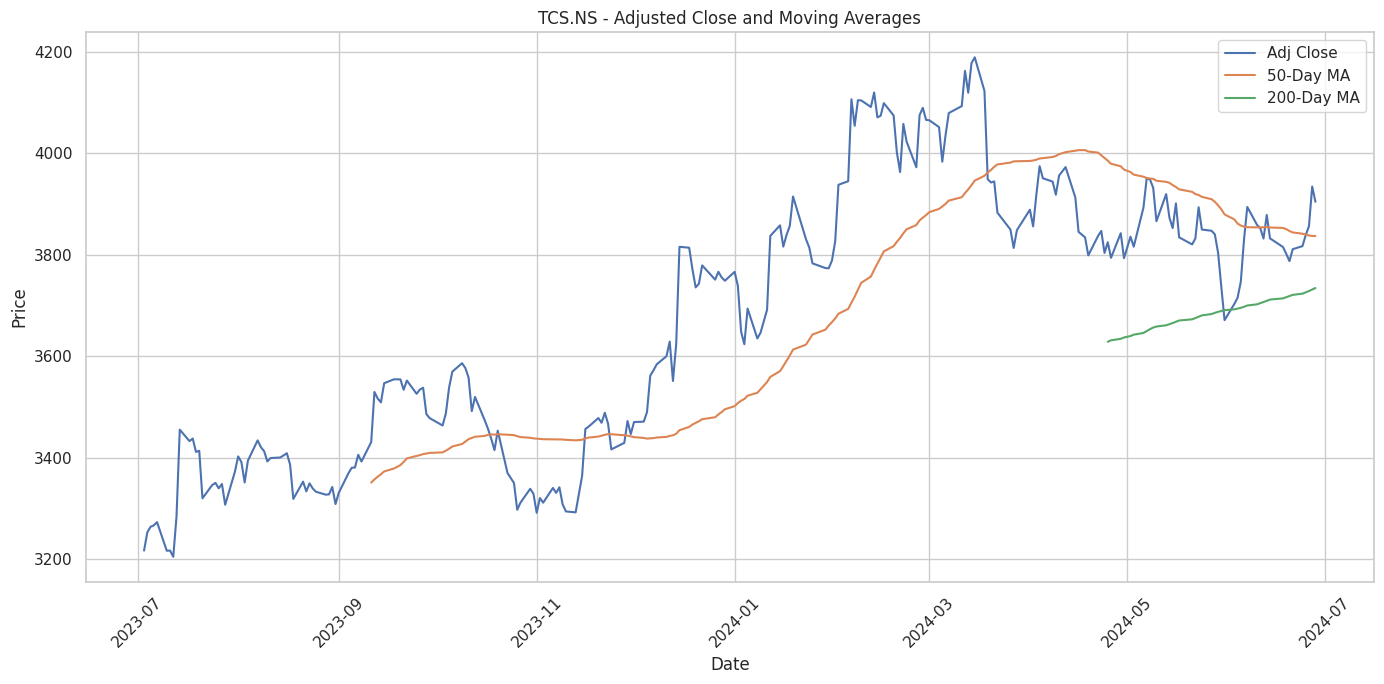

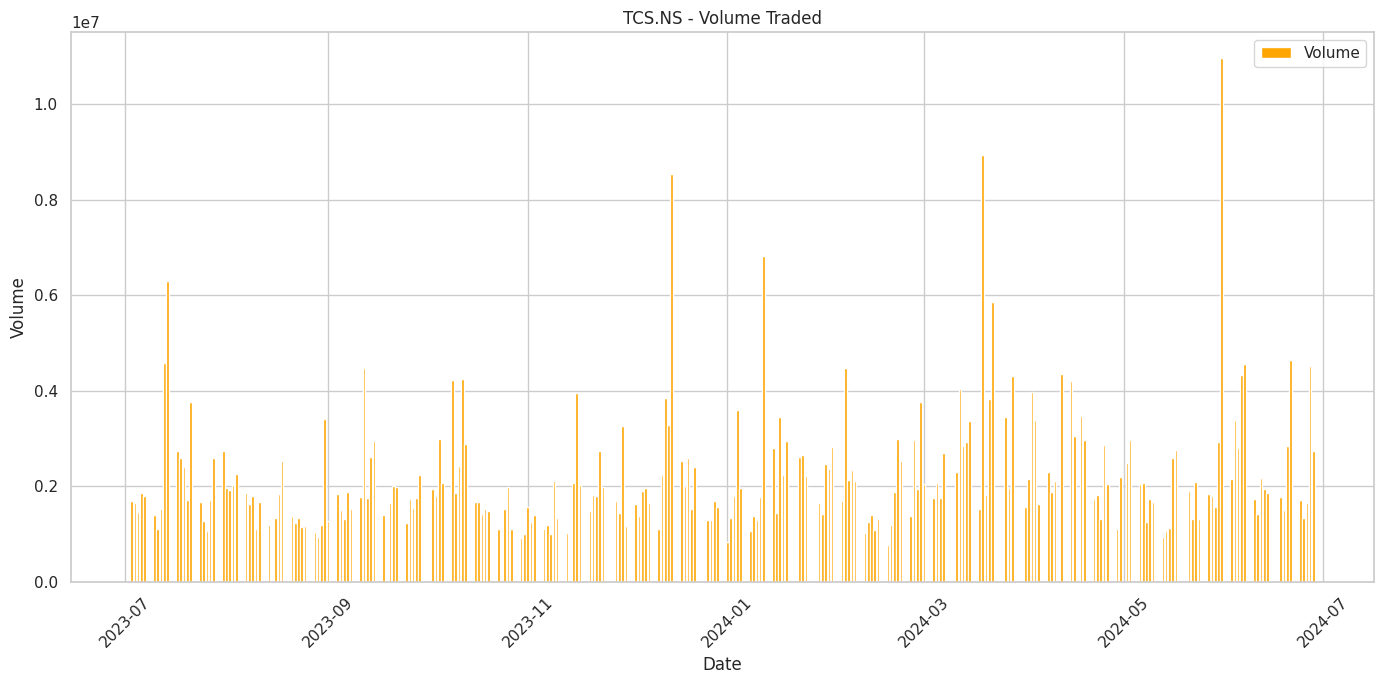

In [7]:
# let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock
#
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages.
- RELIANCE and TCS display a more consistent upward trend in their adjusted close prices.

The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024.

These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions.

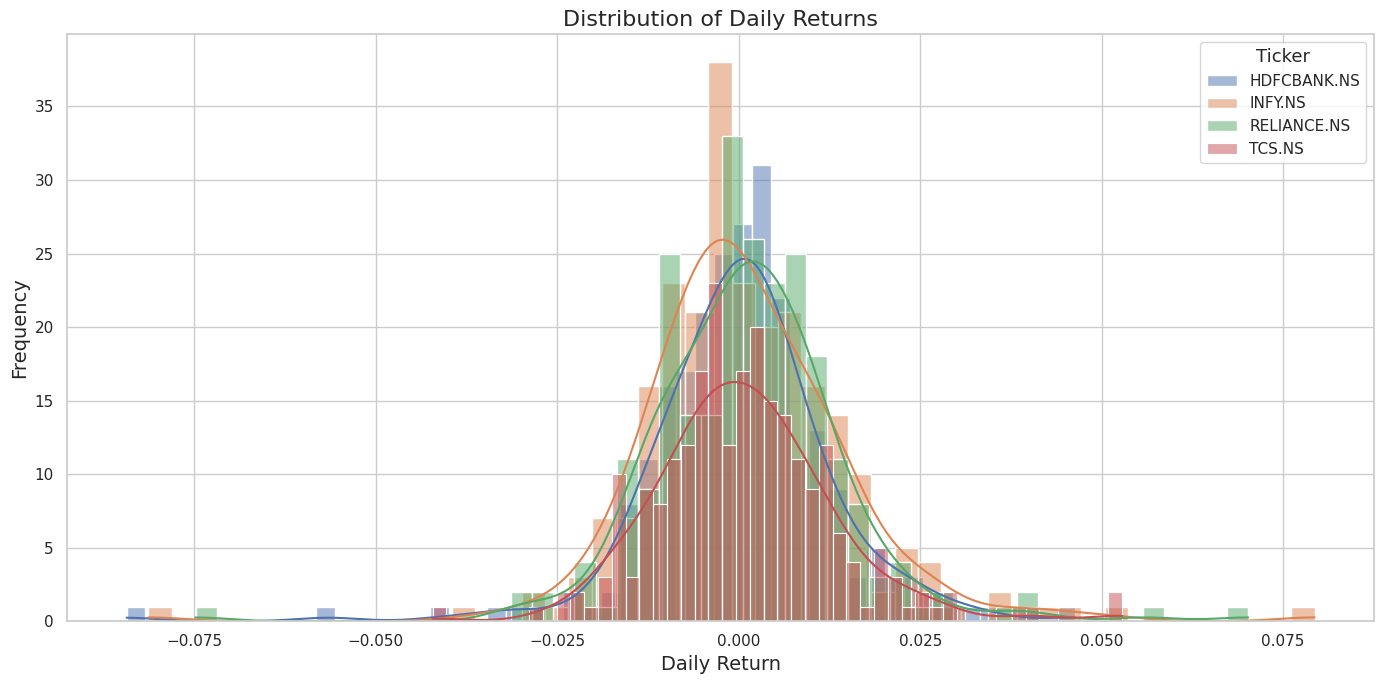

In [8]:
# let’s have a look at the distribution of daily returns of these stocks
#
# The daily return measures the percentage change in a stock's adjusted closing price from one day to the next
#
# Wider distributions (i.e., more spread-out daily returns) indicate higher volatility and risk.
#
# Helps identify patterns like skewness or unusual kurtosis (fat tails), which could imply extreme returns.
#
#
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Insights from the Distribution


**Center of the Distribution:**

The peak of the histogram represents the most frequent daily return for a stock.
Stocks with a higher peak and a narrow spread tend to be more stable.

**Spread (Volatility):**

Wider distributions indicate higher volatility, meaning the stock experiences tionslarger daily price changes.
Narrower distributions suggest a more stable stock with smaller daily fluctuations.

**Tails of the Distribution:**

Fat tails indicate the presence of extreme daily returns (large positive or negative returns).
Understanding this is crucial for risk management.

From our distribution we notice that:

- The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return.

- However, there are tails on both sides, which reflect occasional significant gains or losses.

- INFY and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.

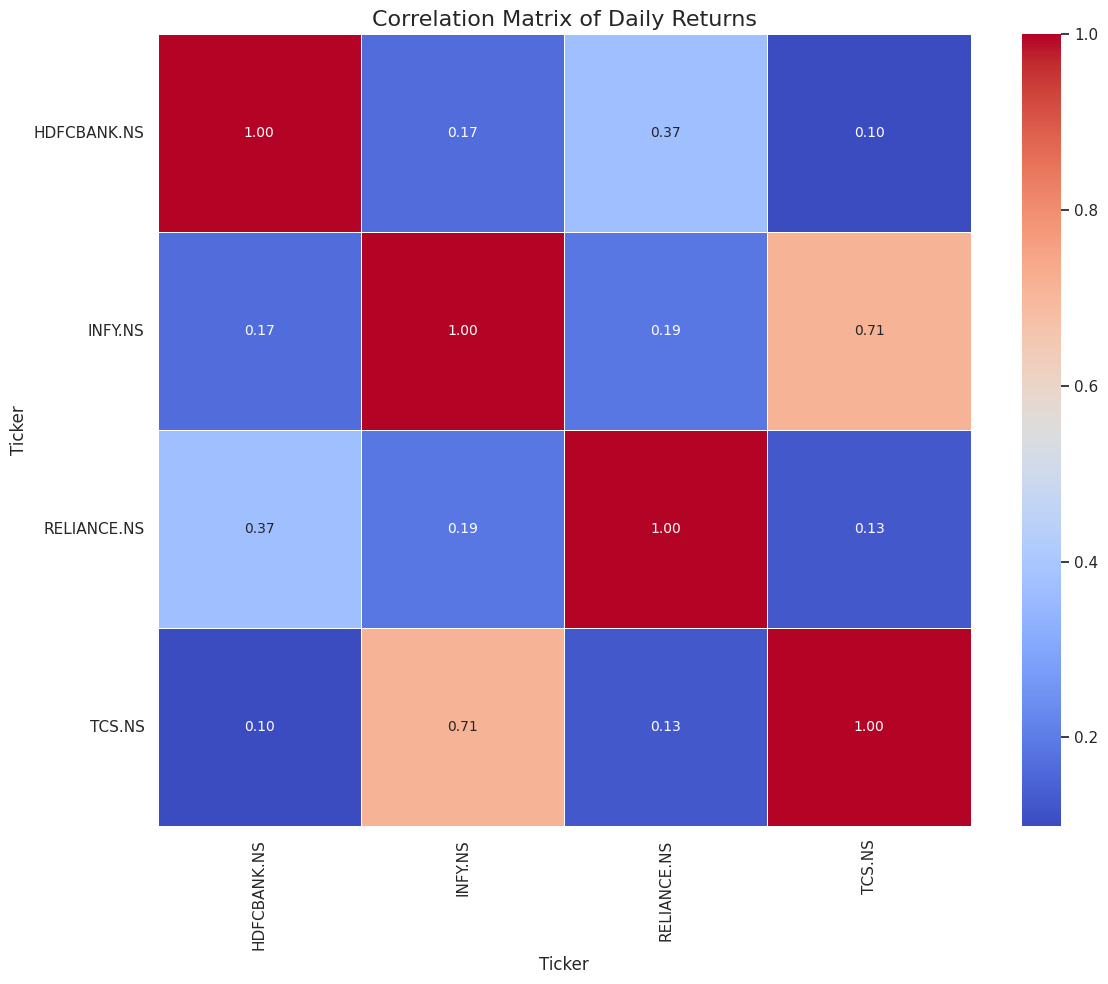

In [9]:
#  let’s see if there’s any correlation between all these stocks
#
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- INFY and TCS have a high positive correlation (0.71), which indicates that they tend to move in the same direction.
- HDFCBANK has a moderate positive correlation with RELIANCE (0.37) and a low correlation with INFY (0.17) and TCS (0.10).
- RELIANCE shows a low correlation with INFY (0.19) and TCS (0.13).

These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

## Porfolio optimization

Using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:

1. Calculate the expected returns and volatility for each stock.
2. Generate a series of random portfolios to identify the efficient frontier.
3. Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

In [10]:
# Let’s calculate the expected returns and volatility for each stock
#
# The expected return is the mean of the stock's daily returns, annualized to represent the return over a year.
#
# Volatility measures the stock's risk or the variability of its returns over time.
#
# Annualized volatility is computed using the standard deviation of daily returns, scaled by the square root of the number of trading days in a year:

import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns. 252 is the average trading days in a year
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.013661,0.206910
INFY.NS,0.213798,0.232261
RELIANCE.NS,0.297343,0.214664
TCS.NS,0.220852,0.196869


- RELIANCE has the highest expected return (29.73%) and moderate volatility (21.47%), which indicates a potentially high-reward investment with relatively higher risk.

- INFY and TCS also have high expected returns (21.38% and 22.09% respectively) with moderate volatility (23.23% and 19.69%).

- HDFCBANK has the lowest expected return (1.37%) and moderate volatility (20.69%), which makes it the least attractive in terms of risk-adjusted returns.